In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

### 1. 데이터 구성하기

In [13]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2_py/체질검사.csv",engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [14]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


### 2. 모델 생성

In [79]:
#기본 옵션으로 트리 생성
rf_uncustomized = RandomForestRegressor(random_state=1)
rf_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.952
Score on test set:0.606


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


설명력이 높아졌음을 볼 수 있다. (의사결정 나무와 비교!!)

In [85]:
#모델 parameter 조정 : 트리 수 변경에 따른 모델 성능

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_n_tree=[n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=1)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [86]:
#모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.952,0.606
1,20,0.955,0.616
2,30,0.953,0.625
3,40,0.952,0.614
4,50,0.953,0.606
5,60,0.954,0.609
6,70,0.954,0.608
7,80,0.954,0.606
8,90,0.955,0.607
9,100,0.955,0.606


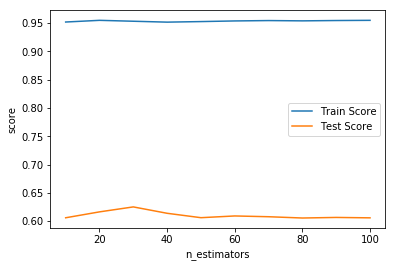

In [87]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

In [89]:
#모델 parameter 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_leaf : 잎사귀 최소 자료 수
para_leaf =[n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,
                                min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [90]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


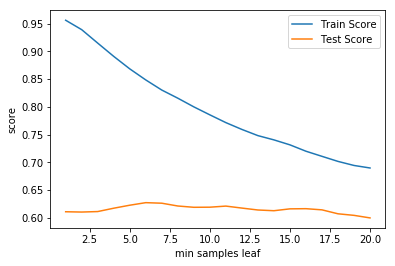

In [91]:
#모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

In [99]:
#모델 parameter 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split =[n_split * 1 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,
                                min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [100]:
#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.956,0.611
1,3,0.953,0.612
2,4,0.948,0.609
3,5,0.942,0.608
4,6,0.934,0.611
5,7,0.926,0.617
6,8,0.917,0.616
7,9,0.909,0.617
8,10,0.900,0.619
9,11,0.891,0.621


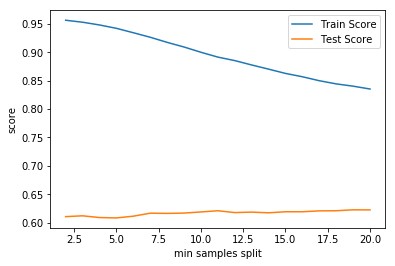

In [101]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

In [102]:
#모델 parameter 조정 : 최대 깊이 변경에 따른 모델 성능

#train, test의 설명력 결과 저장
train_score=[];test_score=[]

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,
                                min_samples_leaf=6, min_samples_split=14,
                                max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [103]:
#모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


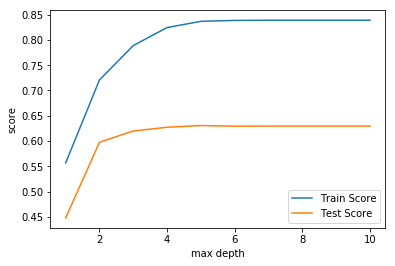

In [106]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

### 3. 결론 도출
최종 모델 생성

In [107]:
rf_final=RandomForestRegressor(random_state=1234,n_estimators=100, min_samples_leaf=6,
                              min_samples_split=14, max_depth=4)
rf_final.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
rf_final

Score on training set:0.825
Score on test set:0.627


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

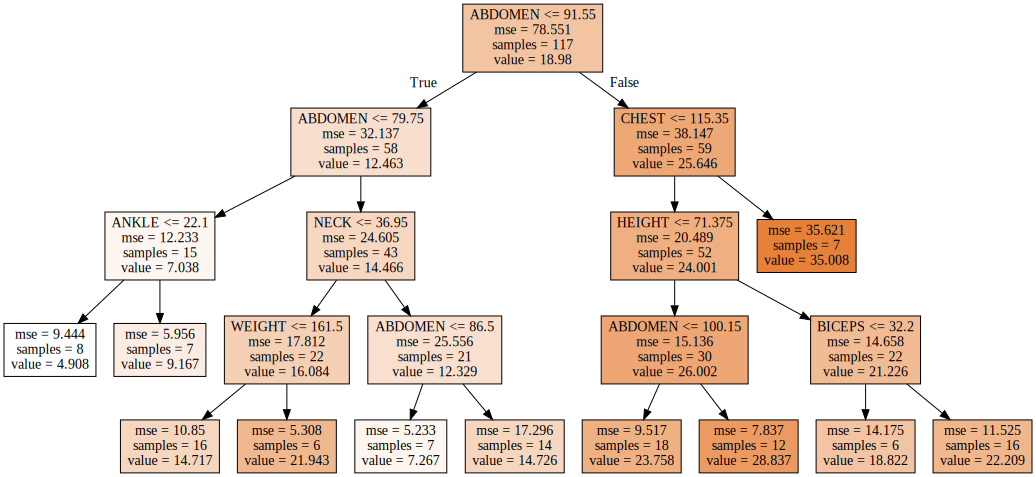

In [108]:
#최종 모델 시각화
#변수명 저장
v_feature_name = df_train_x.columns

#0번 트리
export_graphviz(rf_final.estimators_[0], out_file='rfr_final_0.dot',feature_names=v_feature_name,
               impurity=True, filled=True)

with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

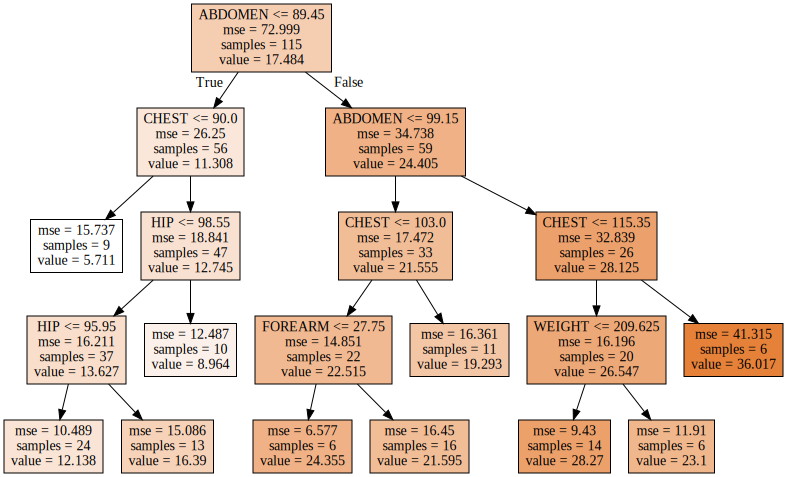

In [109]:
#1번 트리
export_graphviz(rf_final.estimators_[1], out_file='rfr_final_1.dot',feature_names=v_feature_name,
               impurity=True, filled=True)

with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

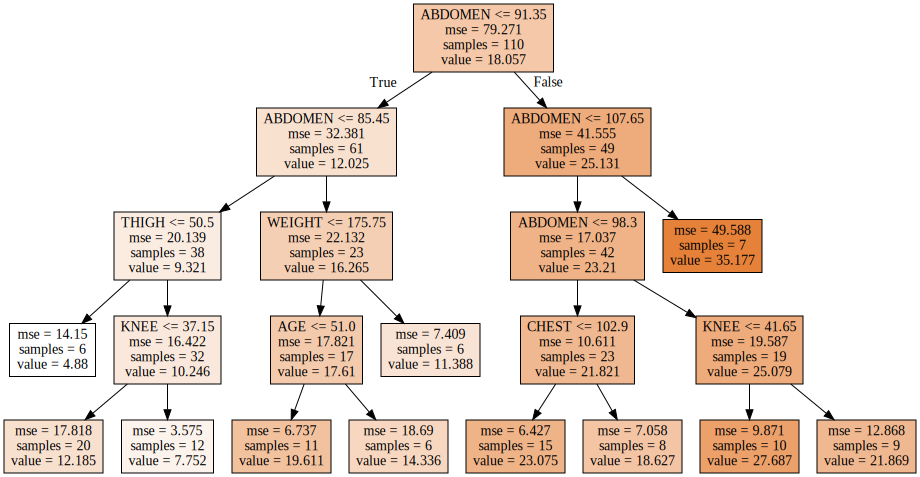

In [110]:
#10번 트리
export_graphviz(rf_final.estimators_[10], out_file='rfr_final_10.dot',feature_names=v_feature_name,
               impurity=True, filled=True)

with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [111]:
#결론 도출 : 설명변수의 중요도

df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

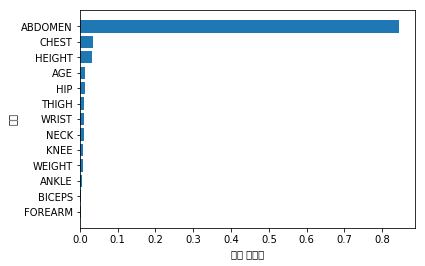

In [112]:
#설명변수 중요도 그래프
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [113]:
## step 2 : GridSearchCV를 이용한 parameter 찾기

estimator = RandomForestRegressor(random_state=1234)
param_grid={'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

best parameter:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
